# Digit recognition and prediction from MNIST dataset

In this project we use different methods of deep learning to classify and use image recognition to predict what digit from 0 to 9 is in the picture.

## Dataset

Dataset used in this project is pre-existing dataset from keras datasets, MNIST. It consists of grayscale images of hand-written digits from 0 to 9.

In [1]:
%%capture
!pip3 install --upgrade scikit-learn

In [2]:
# IMPORTS

def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import random
import datetime
import keras
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

!python3 -m pip show scikit-learn



2023-03-19 19:28:46.162230: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-19 19:28:46.368427: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-19 19:28:46.368515: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-19 19:28:47.762693: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

Name: scikit-learn
Version: 1.0.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /home/jupyterlab/conda/envs/python/lib/python3.7/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: systemml


In [3]:
# Load dataset to training and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# initialize parameters
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

batch_size = 128
optimizer = keras.optimizers.Adam()
num_classes = 10
epochs = 7

In [4]:
# Initial shape of the training and test sets
print(np.shape(y_train))
print(np.shape(x_test))

(60000,)
(10000, 28, 28)


## Reshape the datasets

Now we reshape the datasets for the following forms, y_train and y_test have 10 different categories

**x_train: (60000, 28, 28, 1)**

**x_test: (10000, 28, 28, 1)**

**y_train: (60000, 10)**

**y_test: (10000, 10)**

x_train dimensions:  (60000, 28, 28, 1)
x_test dimensions:  (10000, 28, 28, 1)
y_train dimensions:  (60000, 10)
y_test dimensions:  (10000, 10)


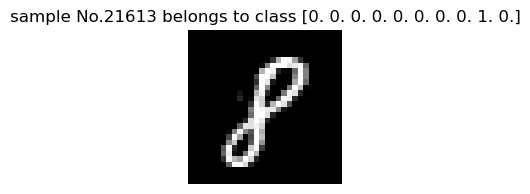

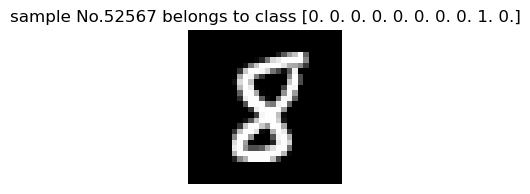

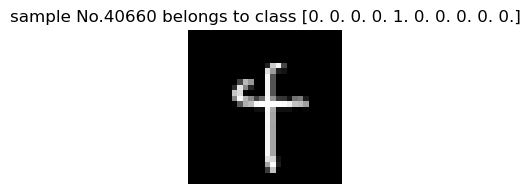

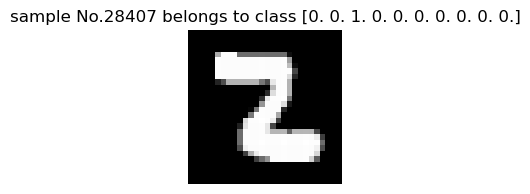

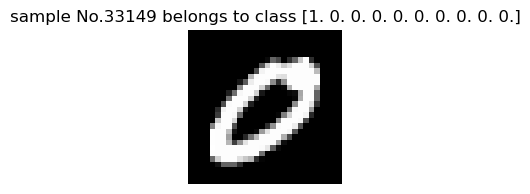

In [5]:
# reshape the data to be processed by CNN
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# Scale data, pixel values range from 0 to 255
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# After reshaping the datasets
print("x_train dimensions: ", np.shape(x_train))
print("x_test dimensions: ", np.shape(x_test))

print("y_train dimensions: ", np.shape(y_train))
print("y_test dimensions: ", np.shape(y_test))

# plot some hand-written digits
for i in range(5):
    r = random.randint(0, 59999)
    plt.figure(figsize=(2,2))
    plt.imshow(x_train[r,:,:,0],cmap="gray")
    plt.title("sample No.{} belongs to class {}".format(r,y_train[r]))
    plt.axis("off")

## First model, Convolutional Neural Network (CNN)

In this model we create a sequential model using convolutional neural networks. First we add convolutional layer with 32 filters and kernel of size 3 x 3 matrix. The input shape of the CNN are dimensions of images (28, 28, 1), where we have only one channel due to fact we use grayscale images. If we would use colored images the channel would equal to 3 since there is three different components, namely RGB (red, green, blue). 

After convolution we use maxPooling to downsample the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size ) for each channel of the input.

The dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.

Flatten layer flattens the input. Does not affect the batch size. For example (28, 28, 1) -> (784, 1)

For last two layers we use hidden layers of size 128 for example. We can change this layers size to see how much it changes the outcome.

Last layers dimension must be equal to number of classes we are trying to predict so we choose **num_classes = 10** since there is 10 digits from 0 to 9.

In [6]:
# Creating Convolutional Neural Network model (CNN)
# Input_shape = (28, 28, 1)

cnn = Sequential()

cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.2))

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(10, activation='softmax'))


2023-03-19 19:28:56.244028: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-19 19:28:56.244118: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-19 19:28:56.244171: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyterlab-joonavaltter): /proc/driver/nvidia/version does not exist
2023-03-19 19:28:56.244672: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# Summary of CNN model
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

## Training the model 

First we compile our model using Adam optimizer from Keras optimizers, categorical crossentropy and for the metrics we choose accuracy of the model.

For training we use **x_train** and **y_train** as training data, batchsize of 128, 10 epochs, **x_test** and **y_test** as validation data and shuffling the data to improve accuracy and shuffling data between the epochs since it helps the training converge fast and prevents any bias during the training. 

In [8]:
# Let's train the model 
cnn.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [9]:
history_cnn = cnn.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_data=(x_test, y_test),
                shuffle=True)


Epoch 1/7
469/469 [==============================] - 85s 180ms/step - loss: 0.2291 - accuracy: 0.9341 - val_loss: 0.0880 - val_accuracy: 0.9728
Epoch 2/7
469/469 [==============================] - 82s 175ms/step - loss: 0.0758 - accuracy: 0.9772 - val_loss: 0.0554 - val_accuracy: 0.9809
Epoch 3/7
469/469 [==============================] - 81s 173ms/step - loss: 0.0532 - accuracy: 0.9836 - val_loss: 0.0548 - val_accuracy: 0.9817
Epoch 4/7
469/469 [==============================] - 80s 171ms/step - loss: 0.0411 - accuracy: 0.9874 - val_loss: 0.0507 - val_accuracy: 0.9829
Epoch 5/7
469/469 [==============================] - 81s 173ms/step - loss: 0.0342 - accuracy: 0.9890 - val_loss: 0.0452 - val_accuracy: 0.9854
Epoch 6/7
469/469 [==============================] - 80s 171ms/step - loss: 0.0264 - accuracy: 0.9917 - val_loss: 0.0428 - val_accuracy: 0.9857
Epoch 7/7
469/469 [==============================] - 80s 171ms/step - loss: 0.0229 - accuracy: 0.9929 - val_loss: 0.0385 - val_accuracy:

In [10]:
history_cnn.history

{'loss': [0.22914639115333557,
  0.07578078657388687,
  0.053169380873441696,
  0.041088562458753586,
  0.03417154774069786,
  0.02637685462832451,
  0.022919779643416405],
 'accuracy': [0.9340500235557556,
  0.977233350276947,
  0.9835500121116638,
  0.9873833060264587,
  0.9890499711036682,
  0.9916666746139526,
  0.9928500056266785],
 'val_loss': [0.08798670768737793,
  0.055403679609298706,
  0.05483582615852356,
  0.0507139191031456,
  0.04516188055276871,
  0.04276001453399658,
  0.03850854933261871],
 'val_accuracy': [0.9728000164031982,
  0.98089998960495,
  0.9817000031471252,
  0.9829000234603882,
  0.9854000210762024,
  0.9857000112533569,
  0.9871000051498413]}

## Results

Now that we have trained our model, it is time to check the results how our model performed accuracy and how much loss each epoch had. 

By running this notebook entirely, we can modify the CNN parameters to see which parameters impact the results the most. 

Here under we plot training accuracy and validation accuracy to compare if there is overfitting, underfitting or is the model in line with both measurements.

Same thing is done for the validation loss and training loss.

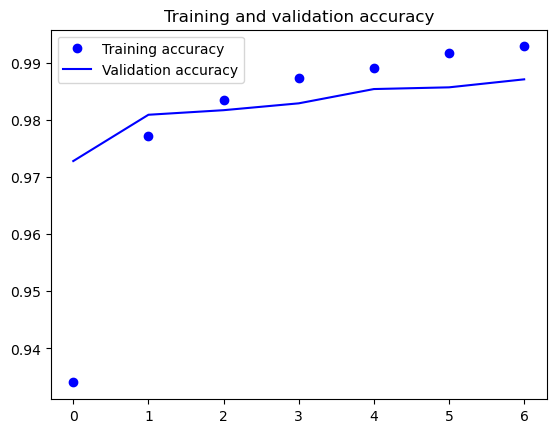

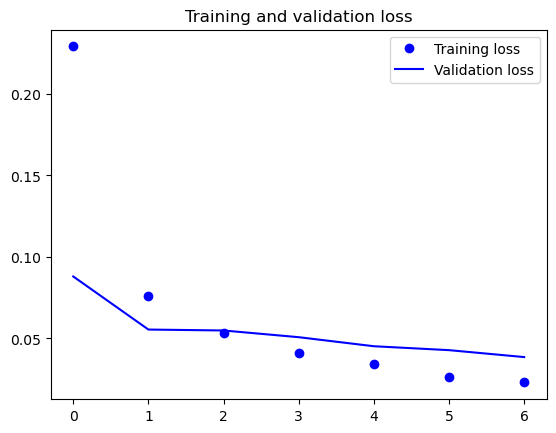

In [11]:
accuracy = history_cnn.history['accuracy']
val_accuracy = history_cnn.history['val_accuracy']
loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']
epochs = range(len(accuracy))

# Plot the validation accuracy and training accuracy for each epoch

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


# Plot the validation loss and training loss for each epoch

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [12]:
# Predictions and metrics

predict_accuracy = cnn.evaluate(x_test, y_test, verbose=0)

print('Test loss:', predict_accuracy[0])
print('Test accuracy:', predict_accuracy[1])


Test loss: 0.03850854933261871
Test accuracy: 0.9871000051498413


In [13]:
# Make prediction with x_test, load data set again to get 1 dimensional datasets for prediction and true values
(x1_train, y1_train), (x1_test, y1_true) = mnist.load_data()

predict_classes = cnn.predict(x_test) 
predict_classes = np.argmax(predict_classes, axis=1)

correct = np.array(predict_classes==y1_true)
incorrect = np.array(predict_classes!=y1_true)

print(predict_classes)
print(y1_true)
print(correct)

313/313 [==============================] - 4s 14ms/step
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]
[ True  True  True ...  True  True  True]


              precision    recall  f1-score   support

     Class 0       0.98      1.00      0.99       980
     Class 1       0.99      0.99      0.99      1135
     Class 2       0.99      0.98      0.99      1032
     Class 3       0.98      0.99      0.99      1010
     Class 4       0.99      0.99      0.99       982
     Class 5       0.99      0.98      0.99       892
     Class 6       0.99      0.98      0.98       958
     Class 7       0.99      0.98      0.98      1028
     Class 8       0.99      0.98      0.98       974
     Class 9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



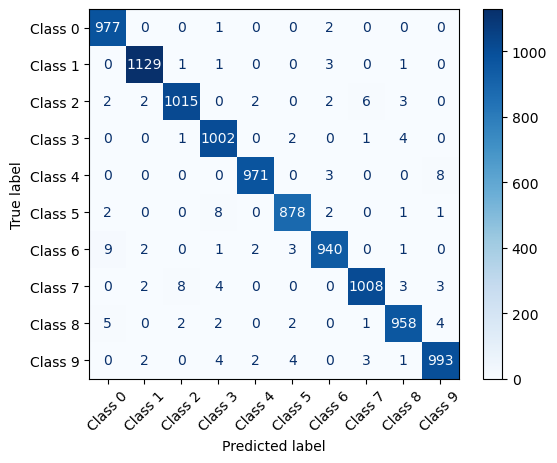

In [14]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y1_true, predict_classes, target_names=target_names))

cm = confusion_matrix(y1_true, predict_classes)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = target_names)

disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.show()